Fall 2024
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="80px" align="right">

DSAI 308, Deep Learning

University of Science and Technology, Zewail City

<br>

<h1 align="center"></h3>
<h1 align="center">Lab 3</h3>
<h1 align="center">Convolutional Neural Networks: Part I</h3>

---

#Lab Objectives
* Understand the benefits of using convolutional neural networks (CNNs) over fully connected networks when dealing with raw image data.
* Learn the main components of CNNs and the significance of each component.
* Learn how to build and train a CNN model using the Keras Sequential API.
* Implement CNN model with tensorflow.


# MNIST Dataset

We will use the MNIST dataset which is a large collection of handwritten digits images, commonly used for training various image processing and machine learning algorithms. It has been a standard benchmark dataset for deep learning and computer vision research.

**Key Characteristics:**
* Classes: 10 (digits 0–9).
* Images: 70,000 grayscale images.
* Training set: 60,000 images.
* Test set: 10,000 images.
* Image size: 28x28 pixels.
* Format: Each pixel is represented by a value between 0 and 255, where 0 represents a black pixel and 255 represents a white pixel. The labels are integers (0-9).

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# summarize the shape of the dataset
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


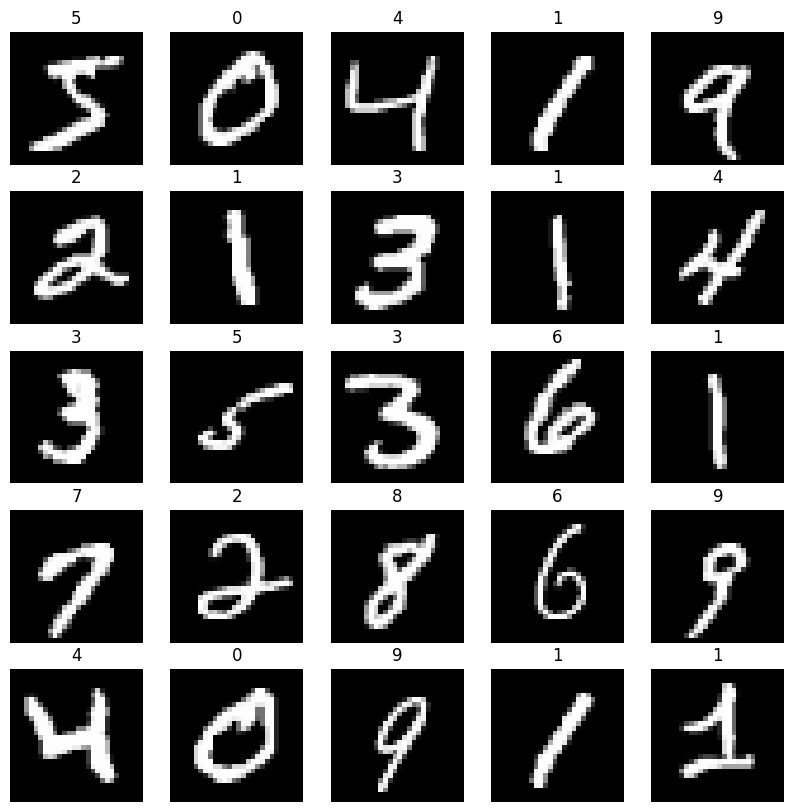

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='Greys_r')
    plt.title(y_train[i])
    plt.axis('off')

plt.show()

In [ ]:
# one-hot encode the data lables
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [ ]:
y_test.shape


(10000, 10)

# Model

In the previous lab, we used a fully connected model to solve this image classification task. However, we could not reach very high accuracy. Generally, fully connected architectures are not the most suitable for raw image data due to many challenges:
<center><img src="https://cs231n.github.io/assets/challenges.jpeg"></center>

Can you think of more challenges? If only we could extract the relevant features before we feed them into the fully connected network!

The main idea behind CNNs is to learn a hierarchy of features directly from the data instead of hand engineering.

<center><img src="https://www.researchgate.net/profile/Shoaib-Siddiqui-4/publication/317558591/figure/fig4/AS:511878728253445@1499052807279/Hierarchical-representation-learning-by-a-Convolutional-Neural-Network-where-the-initial.png"></center>

Fully connected network:
<center><img src="https://miro.medium.com/max/1560/1*XvLQwGBqCGl2nnzGTaYZzA.png" ></center>

How can we use spatial structure in the input to inform the architecture of the network? Idea: Connect patches of input to neurons in hidden layer
<center><img src="https://miro.medium.com/max/1570/1*w-kwBOgwteP2L4H0b8So5w.png" ></center>

Connect patch in input layer to a single neuron in subsequent layer. Use a sliding window to define connections. How can we weight the patch to detect particular features?
<center><img src="https://miro.medium.com/max/1460/1*MA8ahxDITPtj6YB0vMuB7A.png" ></center>

The convolution operation is applied as a summation of the element-wise multiplication of the filter with each patch of the input (+ a bias term). Non-linearity can then be applied by introducing a non-linear activation function to the convolution output.

Another important part of CNNs is pooling layers, which represent each patch of the feature map with a summary statistic. They offer two main benefits:
1. Reduced dimensionality
1. Spatial invariance

Can you think of two examples for such pooling functions?


With all our building blocks explained, a simple CNN might look like this:
<center><img src="https://miro.medium.com/max/2000/0*HWj5PgxWxdcld_ye" ></center>



Now, let's build a CNN to solve our classification problem!

<center><img src="https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2020/05/Cats-Dogs-Classification-deep-learning.gif" ></center>


In [ ]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

def model_builder():
  # Specify model architecture
  model = Sequential()
  # Block 1
  model.add(Conv2D(32, (3, 3),
                  activation='relu',
                  kernel_initializer='he_uniform',
                  padding='same',
                  input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  # Block 2
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  # FC part
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # Print summary
  model.summary()

  # Compile model
  model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = model_builder()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,146 (1.20 MB)

 Trainable params: 315,146 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

## Training

In [ ]:
import tensorflow as tf

NUM_EPOCHS = 20

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 5)

history = model.fit(x_train, y_train,
                    validation_split = 0.2,
                    callbacks = [earlystop],
                    epochs = NUM_EPOCHS)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 44ms/step - accuracy: 0.7887 - loss: 16.0306 - val_accuracy: 0.9623 - val_loss: 0.1654
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.9432 - loss: 0.2891 - val_accuracy: 0.9723 - val_loss: 0.1078
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.9574 - loss: 0.2082 - val_accuracy: 0.9753 - val_loss: 0.1087
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 45ms/step - accuracy: 0.9631 - loss: 0.1783 - val_accuracy: 0.9743 - val_loss: 0.1019
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.9662 - loss: 0.1604 - val_accuracy: 0.9783 - val_loss: 0.0885
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9683 - loss: 0.1456 - val_accuracy: 0.9786 - val_loss: 0.0892
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9676 - loss: 0.1491 - val_accuracy: 0.9752 - val_loss: 0.0929
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.9672 

## Evaluation

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print("Test accuracy is {}%".format(100*acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9804 - loss: 0.0953
Test accuracy is 98.36000204086304%


# Implementing a CNN model using Tensorflow

In [ ]:
# import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

train_labels = tf.one_hot(train_labels, depth=10)
test_labels = tf.one_hot(test_labels, depth=10)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Define the CNN model using TensorFlow
class CNNModel(tf.Module):
    def __init__(self):
        # Initialize weights and biases for each layer
        self.conv1_w = tf.Variable(tf.random.truncated_normal([3, 3, 1, 32], stddev=0.1))
        self.conv1_b = tf.Variable(tf.zeros([32]))

        self.conv2_w = tf.Variable(tf.random.truncated_normal([3, 3, 32, 64], stddev=0.1))
        self.conv2_b = tf.Variable(tf.zeros([64]))

        self.fc1_w = tf.Variable(tf.random.truncated_normal([7 * 7 * 64, 128], stddev=0.1))
        self.fc1_b = tf.Variable(tf.zeros([128]))

        self.fc2_w = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
        self.fc2_b = tf.Variable(tf.zeros([10]))

    def __call__(self, x, training=False):
        # First convolutional layer with ReLU and max pooling
        x = tf.nn.conv2d(x, self.conv1_w, strides=[1, 1, 1, 1], padding='SAME') + self.conv1_b
        x = tf.nn.relu(x)
        x = tf.nn.max_pool2d(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

        # Second convolutional layer with ReLU and max pooling
        x = tf.nn.conv2d(x, self.conv2_w, strides=[1, 1, 1, 1], padding='SAME') + self.conv2_b
        x = tf.nn.relu(x)
        x = tf.nn.max_pool2d(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

        # Flatten the output for the fully connected layer
        x = tf.reshape(x, [-1, 7 * 7 * 64])

        # First fully connected layer with ReLU
        x = tf.matmul(x, self.fc1_w) + self.fc1_b
        x = tf.nn.relu(x)

        # Apply dropout during training
        if training:
            x = tf.nn.dropout(x, rate=0.5)

        # Output layer
        logits = tf.matmul(x, self.fc2_w) + self.fc2_b
        return logits

In [ ]:
# Define the loss function
def loss_fn(logits, labels):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))

# Define the accuracy metric
def accuracy_fn(logits, labels):
    correct_pred = tf.equal(tf.argmax(logits, axis=1), tf.argmax(labels, axis=1))
    return tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [ ]:
# Train the model
@tf.function
def train_step(model, images, labels, optimizer):
    with tf.GradientTape() as tape:
        logits = model(images, training=True)
        loss = loss_fn(logits, labels)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

In [ ]:
# Create the model and optimizer
model = CNNModel()
optimizer = tf.optimizers.Adam()

In [ ]:
# Training loop
EPOCHS = 5
BATCH_SIZE = 64

for epoch in range(EPOCHS):
    batch_start = 0
    while batch_start < len(train_images):
        batch_end = batch_start + BATCH_SIZE
        batch_images = train_images[batch_start:batch_end]
        batch_labels = train_labels[batch_start:batch_end]

        loss = train_step(model, batch_images, batch_labels, optimizer)
        batch_start += BATCH_SIZE

    # Calculate training and test accuracy after each epoch
    train_logits = model(train_images, training=False)
    test_logits = model(test_images, training=False)
    train_acc = accuracy_fn(train_logits, train_labels)
    test_acc = accuracy_fn(test_logits, test_labels)

    print(f'Epoch {epoch+1}, Loss: {loss.numpy()}, Train Accuracy: {train_acc.numpy()}, Test Accuracy: {test_acc.numpy()}')

Epoch 1, Loss: 0.040940433740615845, Train Accuracy: 0.9813166856765747, Test Accuracy: 0.9819999933242798
Epoch 2, Loss: 0.029372673481702805, Train Accuracy: 0.9892333149909973, Test Accuracy: 0.9883999824523926
Epoch 3, Loss: 0.002233075210824609, Train Accuracy: 0.9924666881561279, Test Accuracy: 0.9898999929428101
Epoch 4, Loss: 0.0004915131721645594, Train Accuracy: 0.9929500222206116, Test Accuracy: 0.9889000058174133
Epoch 5, Loss: 0.0013382292818278074, Train Accuracy: 0.9951500296592712, Test Accuracy: 0.9908000230789185


In [ ]:
# Final test evaluation
final_test_logits = model(test_images, training=False)
final_test_acc = accuracy_fn(final_test_logits, test_labels)
print(f"Final Test Accuracy: {final_test_acc.numpy()}")

Final Test Accuracy: 0.9908000230789185


# Task

1. Define a CNN model to do multicalss calssification task on the cifar10 dataset. Do your best to reach the best accuracy with your model architechture.

# **Resources**

https://zerotomastery.io/cheatsheets/tensorflow-cheat-sheet/

https://cs231n.github.io/convolutional-networks/  

https://poloclub.github.io/cnn-explainer/  

https://acrobat.adobe.com/id/urn:aaid:sc:EU:c3214f53-f817-4786-8147-8a78ba8f5ddc